In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 라이브러리 선언

In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### 1. 데이터 불러오기

In [3]:
# gihub -> hyokwan -> features_regression_example -> raw url
dataUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"

In [4]:
featuresData = pd.read_csv(dataUrl)
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


### A. 데이터 전처리

### 1. 타입통합(Skip) / 특성 숫자컬럼 추가

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [6]:
ynLabel = LabelEncoder()

In [7]:
featuresData["PROMOTION_LE"] = ynLabel.fit_transform( featuresData.PROMOTION )
featuresData["HOLIDAY_LE"] = ynLabel.fit_transform( featuresData.HOLIDAY )

In [8]:
promotionScaler = MinMaxScaler()
# HCLUS, PRO_PERCNT
# 각컬럼에 대해서! 각데이터-min / max-min
featuresData["PROMOTION_SC"] = promotionScaler.fit_transform( featuresData.loc[ :,["PRO_PERCENT"]] )
hclusScaler = MinMaxScaler()
# HCLUS, PRO_PERCNT
# 각컬럼에 대해서! 각데이터-min / max-min
featuresData["HCLUS_SC"] = hclusScaler.fit_transform( featuresData.loc[ :,["HCLUS"]] )

### 2. 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainData, testData = train_test_split (featuresData,
                  random_state=30,
                  test_size=0.2)

In [11]:
label = ["QTY"]
features = ["PROMOTION_LE","HOLIDAY_LE","PROMOTION_SC","HCLUS_SC"]
trainDataFeautres = trainData.loc[:, features]
trainDataLabel = trainData.loc[:, label]
testDataFeautres = testData.loc[:, features]
testDataLabel = testData.loc[:, label]

print( trainDataFeautres.shape )
print( trainDataLabel.shape )
print( testDataFeautres.shape )
print( testDataLabel.shape )

(84, 4)
(84, 1)
(21, 4)
(21, 1)


### B. 모델 생성/훈련

### 3. 모델 생성

In [12]:
# input_shape은 그냥 훈련데이터의 문제지의 첫번째..shape

In [13]:
inputShape = trainDataFeautres.loc[77].shape

In [14]:
model = Sequential()
# input Layer: input shape을 포함한 레이어층
model.add( Dense(units=8, activation="relu", input_shape=inputShape))
# hidden Layer: 일반 딥러닝 레이어 (만들고 싶은 만큼 만들기!!!!)
model.add( Dense(units=8, activation="relu"))
# output Layer: 빵틀이 정확하게 들어가야한다!
model.add( Dense(units=1, activation="relu"))

In [16]:
from tensorflow.keras.utils import plot_model

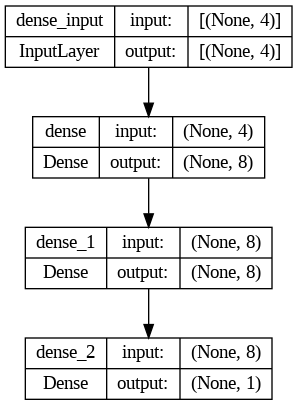

In [17]:
plot_model(model, show_shapes=True)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. 모델 컴파일 (교수(optimizer), 손실함수(loss)) 모델과 엮어준다

In [19]:
model.compile(optimizer='adam',
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

### 5. 모델 훈련

In [ ]:
### callback=earlystopping, modelcheckpoint, tensorboard

In [20]:
#trainDataFeautres.shape
# 84    32 32 20 1epoch => 3번의 weight, bias 업데이트 된다

(84, 4)

In [21]:
history = model.fit(x=trainDataFeautres, # 문제지
          y=trainDataLabel,    # 정답지
          batch_size=32,     # 기본설정 32 w,b 업데이트 단위
          epochs=2000,            # 전체 문제지 몇번 볼래?
          validation_split=0.2 )   #....

Epoch 1/2000
3/3 [==============================] - 1s 113ms/step - loss: 2406974.7500 - mean_absolute_error: 1293.5524 - val_loss: 1624397.8750 - val_mean_absolute_error: 1093.1740
Epoch 2/2000
3/3 [==============================] - 0s 18ms/step - loss: 2406920.7500 - mean_absolute_error: 1293.5382 - val_loss: 1624363.2500 - val_mean_absolute_error: 1093.1615
Epoch 3/2000
3/3 [==============================] - 0s 16ms/step - loss: 2406868.7500 - mean_absolute_error: 1293.5248 - val_loss: 1624329.0000 - val_mean_absolute_error: 1093.1488
Epoch 4/2000
3/3 [==============================] - 0s 27ms/step - loss: 2406821.5000 - mean_absolute_error: 1293.5111 - val_loss: 1624291.0000 - val_mean_absolute_error: 1093.1338
Epoch 5/2000
3/3 [==============================] - 0s 18ms/step - loss: 2406768.2500 - mean_absolute_error: 1293.4954 - val_loss: 1624248.2500 - val_mean_absolute_error: 1093.1168
Epoch 6/2000
3/3 [==============================] - 0s 26ms/step - loss: 2406713.0000 - mean_a

### 7. 모델 예측

In [22]:
model.save("./selloutModel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
features

['PROMOTION_LE', 'HOLIDAY_LE', 'PROMOTION_SC', 'HCLUS_SC']

In [24]:
inputPromotion = 1
inputHoliday = 1
inputPromotionPercent = 0.3
inputHclus = 1 # 1대휴일 4 소휴일
testData = pd.DataFrame( [[ inputPromotion,
                 inputHoliday,
                 inputPromotionPercent,
                 inputHclus ]] )

In [30]:
# 예측할때 모델만 가지고 따로 분리하면 될까?
# model -> xxx.h5 저장
# feature, label 정의 -> features, labels 저장
# feature -> 전처리 함수를 다.... 저장
#            ynlabelencoder, promotionsc, hclusscale

In [33]:
model.save("./selloutmodel.h5")
# 0: feature, 1: label, 2: 전처리함수
modelRef = []
modelRef.append(features)
modelRef.append(label)
modelRef.append([ynLabel, ynLabel, promotionScaler, hclusScaler] )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
import pickle

In [35]:
with open("selloutmodel.dump", "wb") as fw:
    pickle.dump(modelRef,fw)

#### 새로 연 파일

In [36]:
inputPromotion = 1
inputHoliday = 1
inputPromotionPercent = 0.3
inputHclus = 1 # 1대휴일 4 소휴일
testData = pd.DataFrame( [[ inputPromotion,
                 inputHoliday,
                 inputPromotionPercent,
                 inputHclus ]] )

In [ ]:
with open

In [27]:
model.predict( testData )

1/1 [==============================] - 0s 93ms/step


array([[1585.0577]], dtype=float32)